In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-1]
curr_path = "/".join(curr_path)
os.chdir(curr_path)
os.getcwd()

'/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library'

In [2]:
from sclibrary import read_csv, get_coordinates

# read csv
data_folder = 'data/london_street'
filename = data_folder + '/LondonEdges.csv'
delimeter = " "
src_col = 'Source'
dest_col = 'Target'
feature_cols = ['distance', 'lanes', 'speed_limit']

G = read_csv(filename=filename, delimeter=delimeter, src_col=src_col, dest_col=dest_col, feature_cols=feature_cols)
sc = G.to_simplicial_complex(condition="all", dist_col_name="distance", dist_threshold=1.5)
sc.summary()

{'nodes': 82,
 'edges': 130,
 'triangles': 12,
 'shape': (82, 130, 12),
 'max_dim': 2,
 'is_connected': True,
 'edge_feature_names': ['distance', 'lanes', 'speed_limit']}

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:168: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
/var/folders/py/wfd5gjj55nx4cqtdvltb22mw0000gp/T/ipykernel_88527/4115130490.py:16: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  scplot.draw_network(ax=ax)


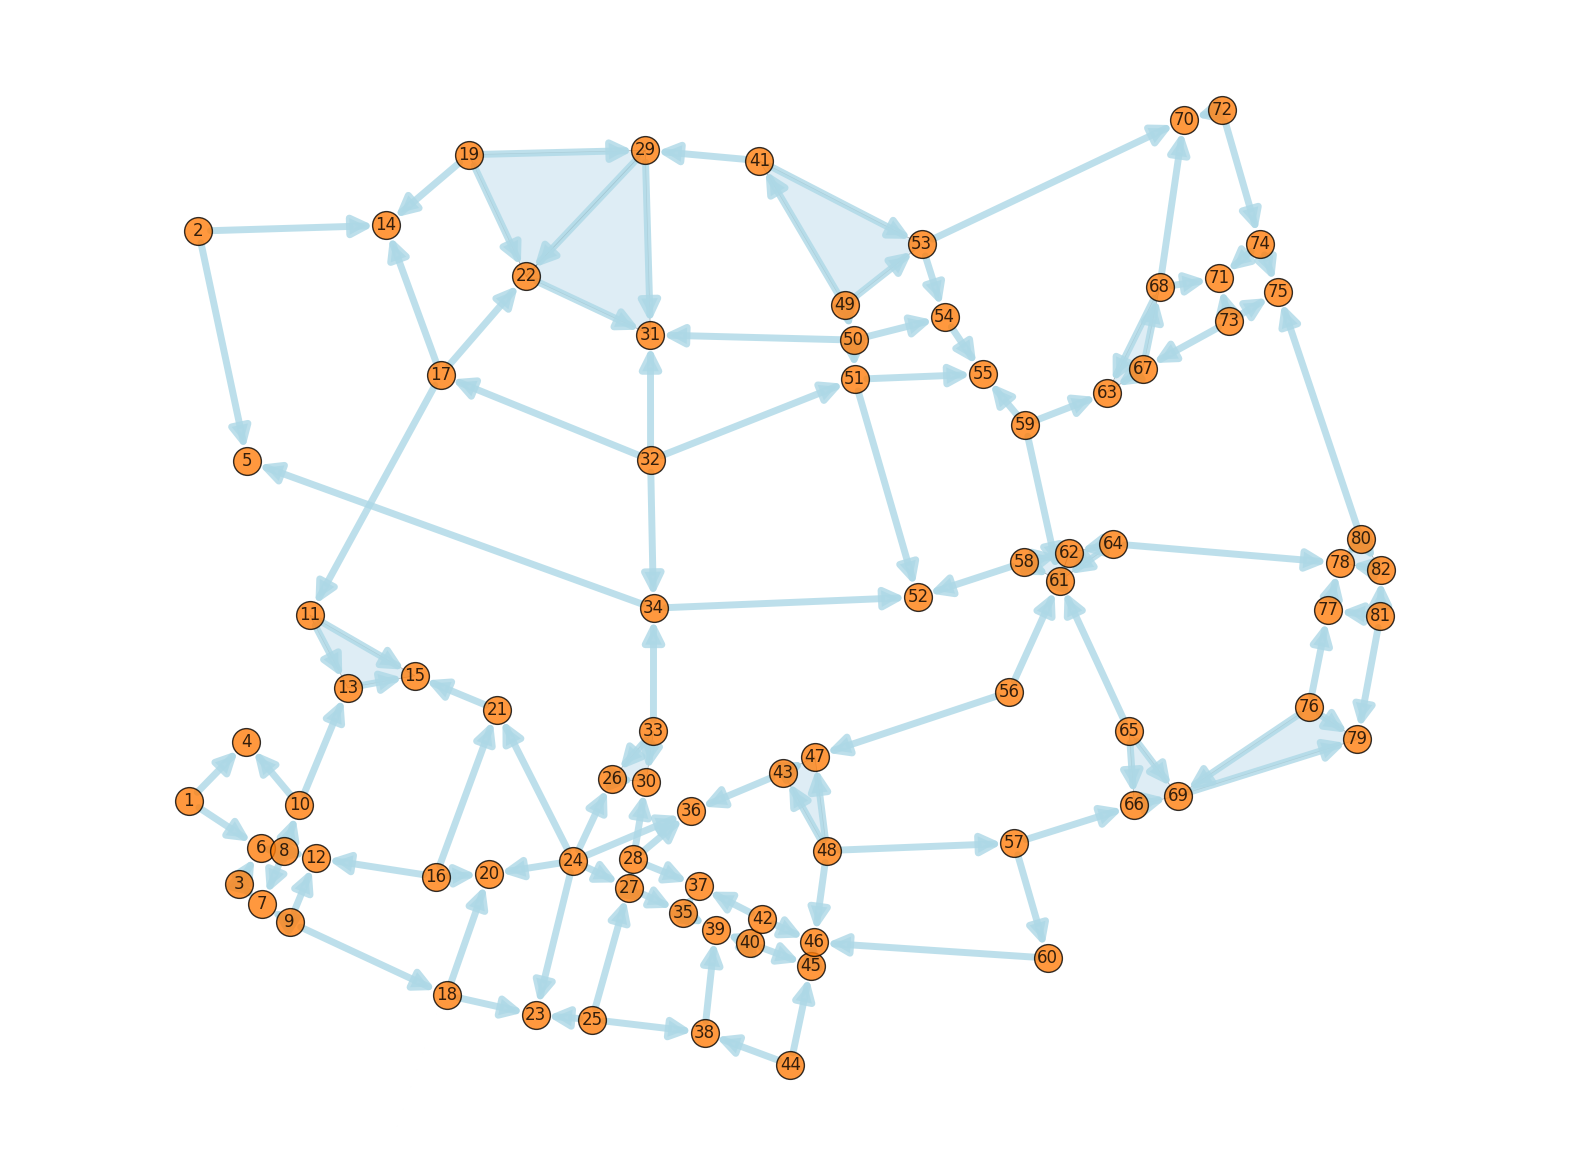

In [3]:
from sclibrary import SCPlot
import matplotlib.pyplot as plt

# if coordinates exist
filename = data_folder + '/LondonNodes.csv'
coordinates = get_coordinates(filename=filename, 
                                node_id_col="Id", 
                                x_col='X', 
                                y_col='Y', 
                                delimeter=",")

scplot = SCPlot(simplical_complex=sc, coordinates=coordinates)

# create a figure size and ax
fig, ax = plt.subplots(figsize=(20, 15))
scplot.draw_network(ax=ax)

/var/folders/py/wfd5gjj55nx4cqtdvltb22mw0000gp/T/ipykernel_88527/1985921589.py:3: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  scplot.draw_network(edge_labels=distances, with_labels=True, ax=ax)


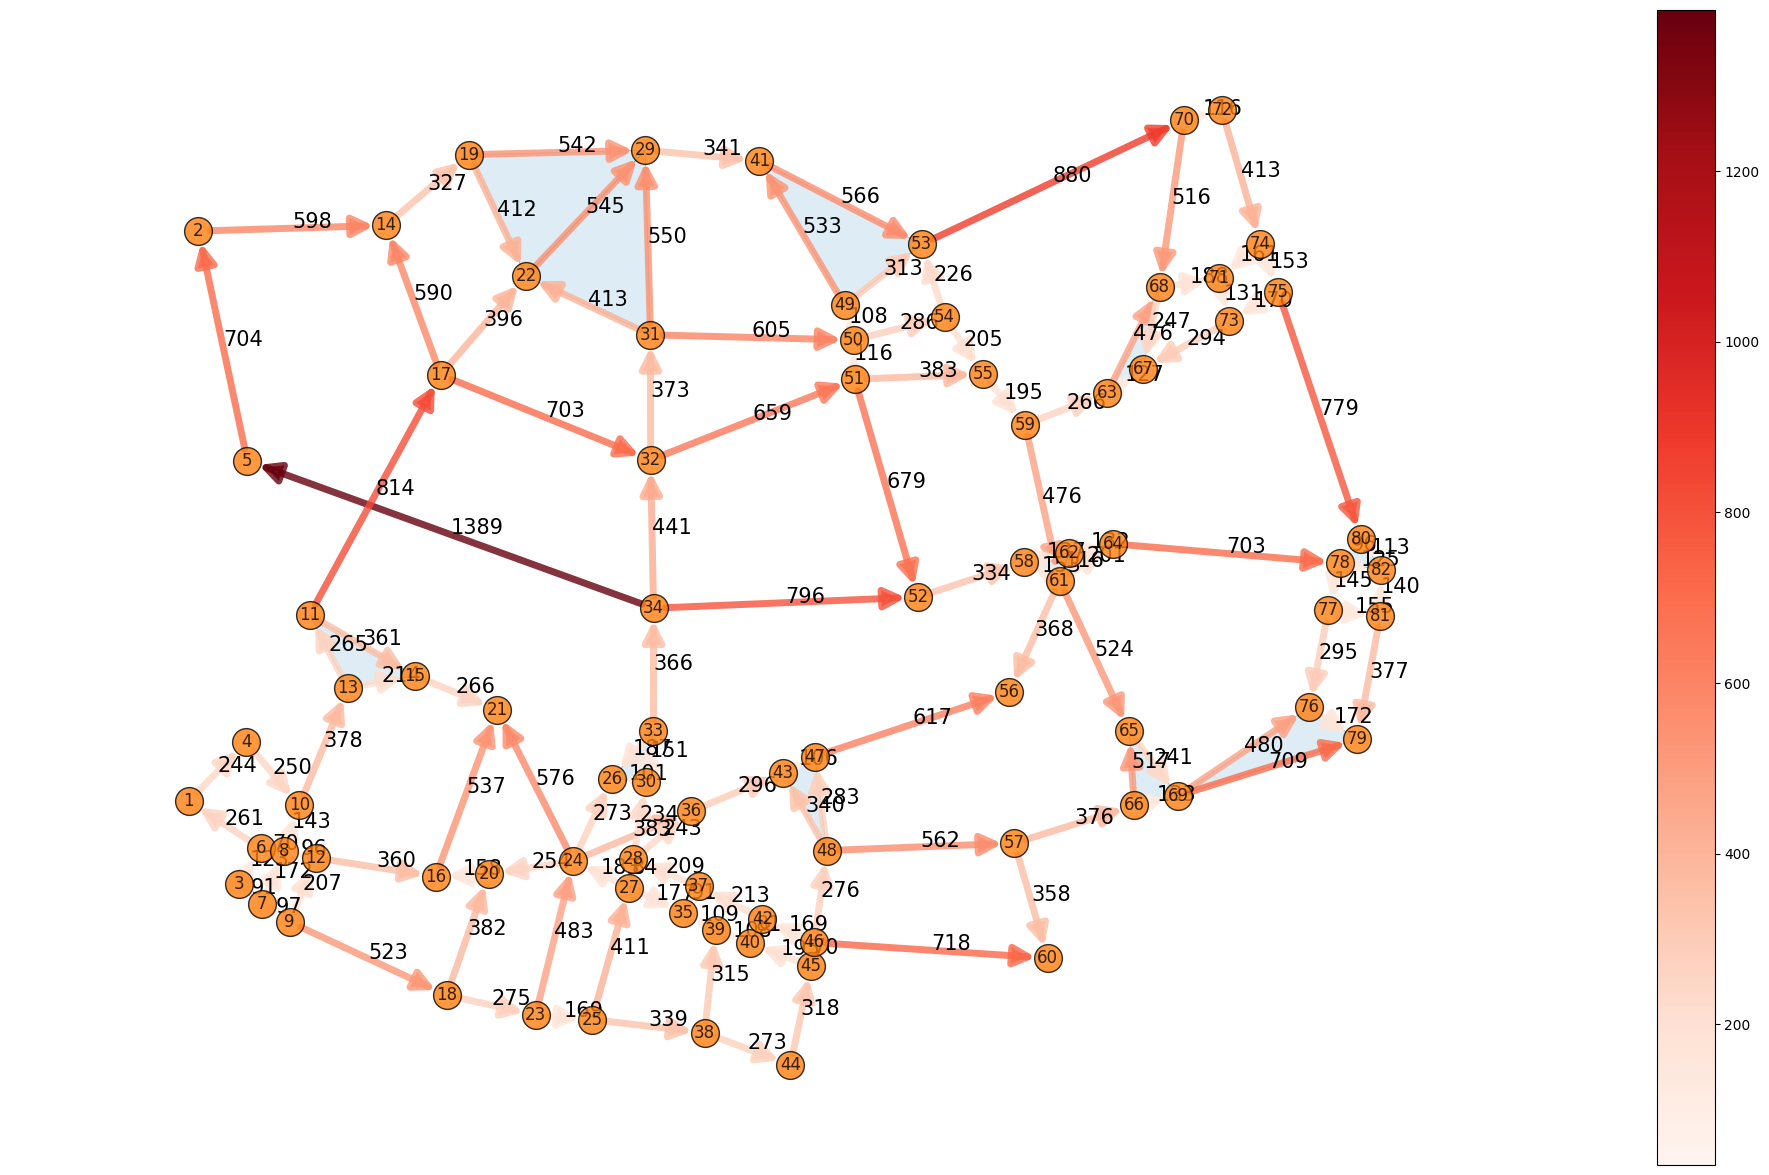

In [6]:
fig, ax = plt.subplots(figsize=(25, 15))
distances  = sc.get_edge_features("distance")
scplot.draw_network(edge_labels=distances, with_labels=True, ax=ax)